This demo notebook shows how to use the routines in pbe.py to:

- Given $W\in \mathbb{R}^{m\times n}$, 
apply the Monte Carlo bias estimation (mcbe) on $K=\mathbb{S}_{r},\mathbb{B}_{r},\mathbb{R}^{n},\mathbb{B}_{r} \setminus \mathbb{B}_{k} \text{ with } k<r$ 
to obtain a estimated bias $\alpha^\mathbb{K}$ such that $\operatorname{ReLU}(W\bullet -\alpha^\mathbb{K})$ 
is injective
- Reconstruct $x$ from $y =\operatorname{ReLU}(Wx-\alpha^\mathbb{K})$

In [1]:
import numpy as np
import mcbe
import matplotlib.pyplot as plt
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

Examples: Icosahedron and random frame on the sphere

In [2]:
phi = (1+np.sqrt(5))/2
ico = np.array([[0,1,phi],[0,1,-phi],[0,-1,phi],[0,-1,-phi],
                [1,phi,0],[-1,phi,0],[1,-phi,0],[-1,-phi,0],
                [phi,0,1],[phi,0,-1],[-phi,0,1],[-phi,0,-1]])/(np.sqrt(1+phi**2))
ran = mcbe.norm_row(np.random.randn(12,3))[0]

compute $\alpha^\mathbb{K}$ using Monte Carlo Bias Estimation  

In [3]:
alpha_ran, means_alpha_ran, subframes_ran = mcbe.mcbe(ran, distribution = "donut", give_subframes=True, thres_range=10000)
print('alpha^D for a random frame:', alpha_ran)

alpha converged after 44551 iterations
alpha^D for a random frame: [-0.10263782 -0.1485457  -0.08871078  0.04114456 -0.09487051 -0.06848921
  0.0282665  -0.10215501  0.01908839 -0.14370967  0.01757745 -0.12700495]


In [4]:
alpha_ico, means_alpha_ico, subframes_ico = mcbe.mcbe(ico, distribution = "sphere", give_subframes=True, thres_range=10000)
print('alpha^S for the Icosahedron frame:', alpha_ico)

alpha converged after 38171 iterations
alpha^S for the Icosahedron frame: [0.45157422 0.45079837 0.45524626 0.45016336 0.44924354 0.45642193
 0.44859    0.45029753 0.45151286 0.45132078 0.45020776 0.4533718 ]


Error analysis for the icosahedron, where the maximum bias is known to be phi/(1+phi**2)

In [8]:
print('Approximation error: ', np.linalg.norm(alpha_ico - phi/(1+phi**2)))

Approximation error:  0.016960269621958513


visualize the first 5000 iterations of the trainings process of Monte Carlo Bias Estimation validated on 100 random test points

In [5]:
inj_ico = mcbe.injectivity_on_test_set(ico, distribution="sphere",num_test_points=100,num_iter=5000)

100%|██████████| 5000/5000 [00:06<00:00, 715.13it/s]


Text(0.5, 1.0, 'percent of test points in K=S for which the relu layer with the icosahedron is injective')

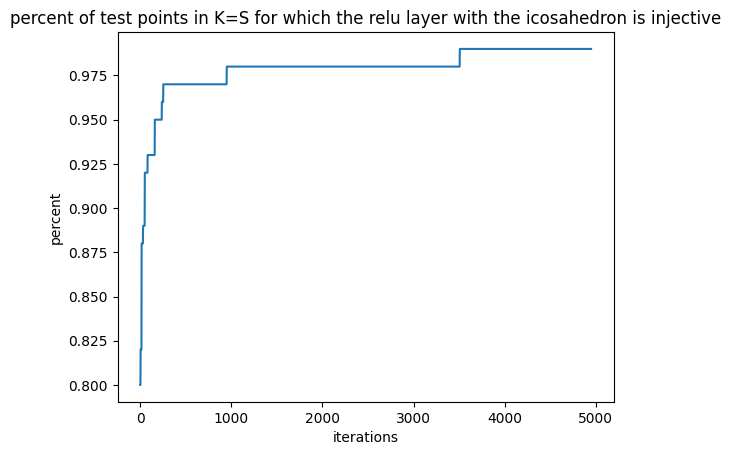

In [6]:
plt.plot(inj_ico)
plt.xlabel("iterations")
plt.ylabel("percent")
plt.title("percent of test points in K=S for which the relu layer with the icosahedron is injective")

reconstruction of a random vector

In [7]:
x_S = mcbe.get_point("sphere",d=3)
x_D = mcbe.get_point("donut",d=3)

z_ico = mcbe.relu(x_S, ico, alpha_ico)
z_ran = mcbe.relu(x_D, ran, alpha_ran)

x_hat_S = mcbe.relu_inv(z_ico, ico, alpha_ico, [list(subf) for subf in list(subframes_ico)])
x_hat_D = mcbe.relu_inv(z_ran, ran, alpha_ran, [list(subf) for subf in list(subframes_ran)])

print('Error on the icosahedron example:', np.linalg.norm(x_S-x_hat_S))
print('Error on the random frame example:', np.linalg.norm(x_D-x_hat_D))

Facet 3 with vertices [2, 7, 10] is used for reconstruction.
Facet 0 with vertices [0, 7, 10] is used for reconstruction.
Error on the icosahedron example: 4.335559509131367e-16
Error on the random frame example: 3.3306690738754696e-16
